In [1]:
import numpy as np

from gb import simulate
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

plt.ion()

In [2]:
Alpha = np.zeros(shape=(3, 3), dtype='d')
Alpha[0, 0] = 0.5
Alpha[0, 1] = 0.5
Alpha[1, 0] = 0.5
Alpha[1, 1] = 0.5
Alpha[2, 2] = 1
print(Alpha)
Beta = np.ones(shape=Alpha.shape)
mus = np.ones(len(Alpha)) * 0.001

[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]


In [4]:
sim = simulate.GrangeBuscaSimulator(mus, Alpha, Beta, thinning=False)
ticks = sim.simulate(30000)

In [5]:
counting = [np.arange(len(ticks[i])) for i in range(len(ticks))]

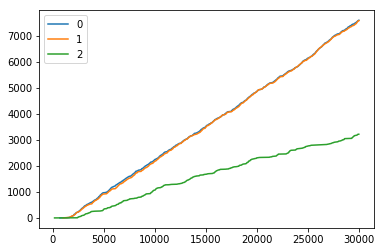

In [6]:
for i in range(len(ticks)):
    plt.plot(ticks[i], counting[i], label='%d' % i)
plt.legend()

Text(0,0.5,'$P[X > x]$')

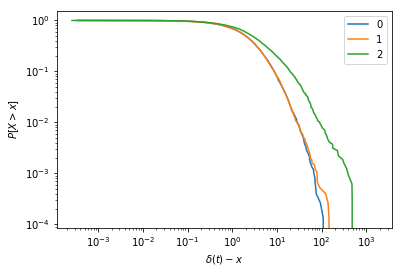

In [7]:
for i in range(len(ticks)):
    vals = np.ediff1d(ticks[i])
    ecdf = ECDF(vals)
    x_ticks = np.unique(vals)
    plt.loglog(x_ticks, (1-ecdf(x_ticks)), label='%d' % i)
plt.legend()
plt.xlabel(r'$\delta(t) - x$')
plt.ylabel(r'$P[X > x]$')

In [8]:
from scipy import stats as ss

7587


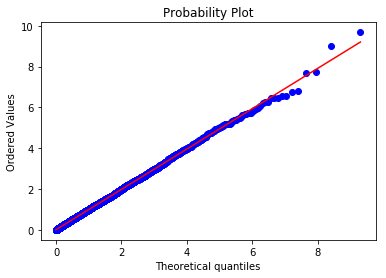

KstestResult(statistic=0.010335579669195238, pvalue=0.39236630717741766)
7571


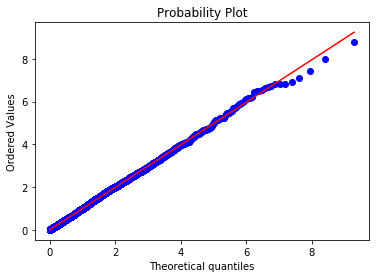

KstestResult(statistic=0.010975913409747129, pvalue=0.32134856172002535)
3212


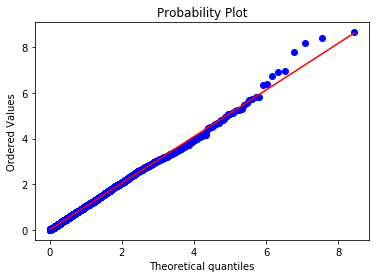

KstestResult(statistic=0.01688218550302456, pvalue=0.31922142946615134)


In [9]:
for i in range(len(sim.integrals)):
    print(len(sim.integrals[i]))
    ss.probplot(sim.integrals[i], dist=ss.expon, plot=plt)
    plt.show()
    plt.close()
    print(ss.kstest(sim.integrals[i], 'expon'))

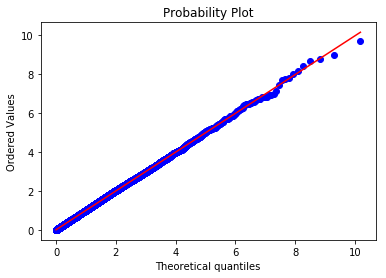

KstestResult(statistic=0.005278998693502401, pvalue=0.6853112515133399)


In [10]:
all_ints = []
for i in range(len(sim.integrals)):
    all_ints.extend(sim.integrals[i])
    
ss.probplot(all_ints, dist=ss.expon, plot=plt)
plt.show()
plt.close()
print(ss.kstest(all_ints, 'expon'))

# Com Thinning

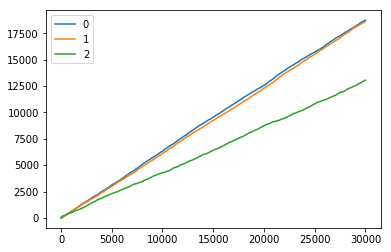

In [15]:
sim = simulate.GrangeBuscaSimulator(mus, Alpha, Beta, thinning=True)
ticks = sim.simulate(30000)
counting = [np.arange(len(ticks[i])) for i in range(len(ticks))]
for i in range(len(ticks)):
    plt.plot(ticks[i], counting[i], label='%d' % i)
plt.legend()

Text(0,0.5,'$P[X > x]$')

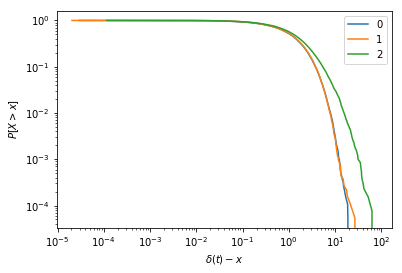

In [16]:
for i in range(len(ticks)):
    vals = np.ediff1d(ticks[i])
    ecdf = ECDF(vals)
    x_ticks = np.unique(vals)
    plt.loglog(x_ticks, (1-ecdf(x_ticks)), label='%d' % i)
plt.legend()
plt.xlabel(r'$\delta(t) - x$')
plt.ylabel(r'$P[X > x]$')

18731


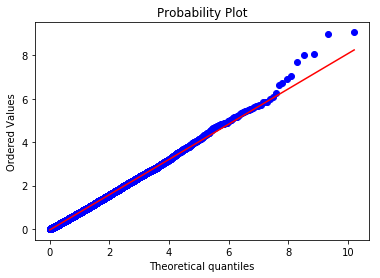

KstestResult(statistic=0.10405435586109635, pvalue=1.3986042513112754e-176)
18605


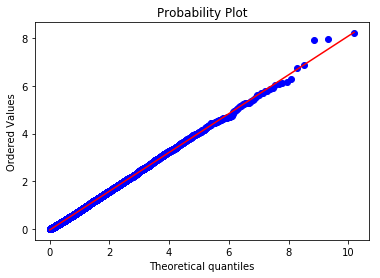

KstestResult(statistic=0.1020032020392907, pvalue=1.4481635755365034e-168)
13053


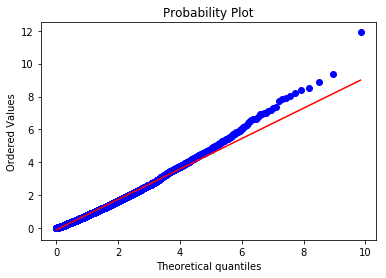

KstestResult(statistic=0.0986821917586147, pvalue=7.809154728936602e-111)


In [17]:
for i in range(len(sim.integrals)):
    print(len(sim.integrals[i]))
    ss.probplot(sim.integrals[i], dist=ss.expon, plot=plt)
    plt.show()
    plt.close()
    print(ss.kstest(sim.integrals[i], 'expon'))

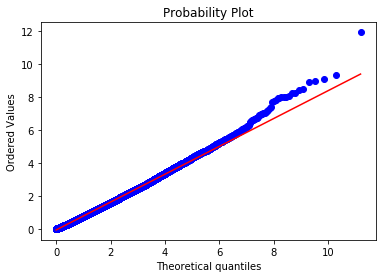

KstestResult(statistic=0.10117855080328353, pvalue=0.0)


In [18]:
all_ints = []
for i in range(len(sim.integrals)):
    all_ints.extend(sim.integrals[i])
    
ss.probplot(all_ints, dist=ss.expon, plot=plt)
plt.show()
plt.close()
print(ss.kstest(all_ints, 'expon'))

In [19]:
from sklearn.preprocessing import normalize

Alpha=np.array([
    [0.,0.,0.,0.,0.,0.17,0.17,0.17,0.17,0.17],
    [0.,0.,0.,0.,0.,0.17,0.17,0.17,0.17,0.],
    [0.,0.17,0.17,0.,0.,0.17,0.17,0.17,0.,0.],
    [0.,0.17,0.17,0.,0.,0.17,0.17,0.,0.,0.],
    [0.,0.,0.,0.,0.,0.17,0.,0.,0.,0.],
    [0.,0.,0.,0.,0.17,0.,0.,0.,0.,0.],
    [0.,0.,0.,0.17,0.17,0.,0.,0.,0.,0.],
    [0.,0.,0.17,0.17,0.17,0.,0.,0.,0.,0.],
    [0.,0.17,0.17,0.17,0.17,0.,0.,0.,0.,0.],
    [0.17,0.17,0.17,0.17,0.17,0.,0.,0.,0.,0.]
])
Alpha=normalize(Alpha,'l1')
Beta = np.ones(shape=Alpha.shape)
mus = np.ones(len(Alpha)) * 0.01

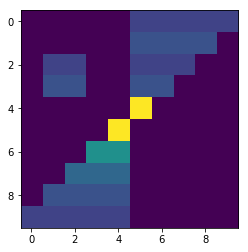

In [20]:
plt.imshow(Alpha)

In [21]:
Beta

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [71]:
sim = simulate.GrangeBuscaSimulator(mus, Alpha, Beta)
ticks = sim.simulate(200000)

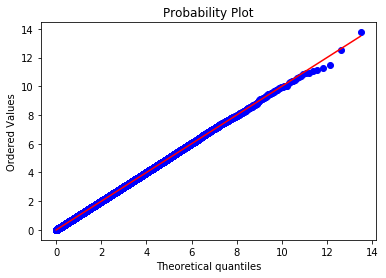

KstestResult(statistic=0.0017006964332667573, pvalue=0.1104329881460883)


In [72]:
from scipy import stats as ss
all_ints = []
for i in range(len(sim.integrals)):
    all_ints.extend(sim.integrals[i])
    
ss.probplot(all_ints, dist=ss.expon, plot=plt)
plt.show()
plt.close()
print(ss.kstest(all_ints, 'expon'))

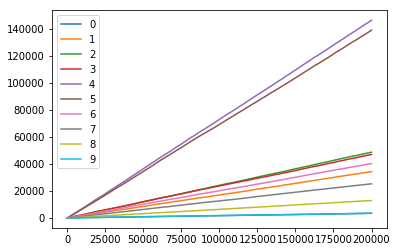

In [73]:
counting = [np.arange(len(ticks[i])) for i in range(len(ticks))]
for i in range(len(ticks)):
    plt.plot(ticks[i], counting[i], label='%d' % i)
plt.legend()

In [74]:
for i in range(len(ticks)):
    print(counting[i][-1])

3422
34245
48684
46999
146437
139029
40274
25280
12874
3450


In [75]:
from gb import GrangerBusca
granger_model = GrangerBusca(alpha_prior=1.0/len(ticks), num_iter=300,
                             metropolis=True)

In [76]:
granger_model.fit(ticks)

{0: 146438, 1: 139030, 2: 108212, 3: 107024}
{0: array([4], dtype=uint64), 1: array([5], dtype=uint64), 2: array([2, 1, 7], dtype=uint64), 3: array([3, 6, 8, 9, 0], dtype=uint64)}


In [77]:
print(granger_model.mu_)
np.set_printoptions(precision=2)


[0.01 0.08 0.11 0.11 0.33 0.32 0.09 0.06 0.03 0.01]


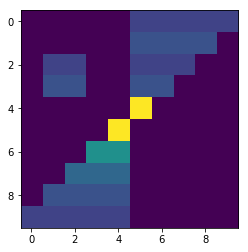

In [78]:
plt.imshow(Alpha)

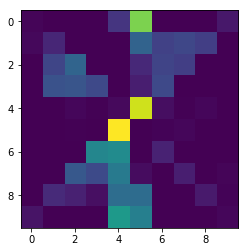

In [79]:
plt.imshow(normalize(granger_model.Alpha_.toarray(), 'l1'))

In [80]:
granger_model.Alpha_

<10x10 sparse matrix of type '<class 'numpy.uint64'>'
	with 73 stored elements in Compressed Sparse Row format>